# LAB 1

### (a)

In [1]:
def insert_sort(arr, comp_cnt):
    n = len(arr)
    for i in range(1, n):
        for j in range (i, 0, -1):
            comp_cnt += 1
            if arr[j] < arr[j - 1]:
                arr[j], arr[j - 1] = arr[j - 1], arr[j]
            else:
                break
    return arr, comp_cnt

def merge_sort(arr, S, comp_cnt):
    n = len(arr)
    sorted_arr = []
    total_cnt = comp_cnt

    if (n <= S):
        sorted_arr, total_cnt = insert_sort(arr, comp_cnt)
    else:
        mid  = int(n / 2)
        l, lcnt = merge_sort(arr[:mid], S, comp_cnt) 
        r, rcnt = merge_sort(arr[mid:], S, comp_cnt)

        comp_cnt = lcnt + rcnt
        sorted_arr, total_cnt = merge(l, r, comp_cnt)

    return sorted_arr, total_cnt
    
def merge(arr_1, arr_2, comp_cnt):
    sort = []
    i, j = 0, 0

    while i < len(arr_1) and j < len(arr_2):
        comp_cnt += 1
        if arr_1[i] < arr_2[j]:
            sort.append(arr_1[i])
            i += 1
        else:
            sort.append(arr_2[j])
            j += 1

    # Append remaining elements
    sort.extend(arr_1[i:])
    sort.extend(arr_2[j:])

    return sort, comp_cnt

In [2]:
arr = [7, 2, 5, 3, 9, 1]
threshold = 3
sorted_arr, comparisons = merge_sort(arr, threshold, 0)
print("Sorted:", sorted_arr)
print("Comparisons:", comparisons)

Sorted: [1, 2, 3, 5, 7, 9]
Comparisons: 11


### C i

In [3]:
import numpy as np
import pandas as pd

def generate_test_data(sizes):
    data = {}
    for size in sizes:
        arr = np.random.randint(1, size + 1, size).tolist()
        data[size] = arr
    return data

sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]
test_data = generate_test_data(sizes)


In [4]:
results = []

for size, arr in test_data.items():
    _, comparisons = merge_sort(arr, S=100, comp_cnt=0)  # You can tune S later
    results.append({'Array Size': size, 'Comparisons': comparisons})

df = pd.DataFrame(results)


In [5]:
df

,Array Size,Comparisons
0,1000,20673
1,5000,129635
2,10000,271112
3,50000,1700186
4,100000,3505941
5,500000,14445924
6,1000000,29927778
7,5000000,178649897
8,10000000,367333436


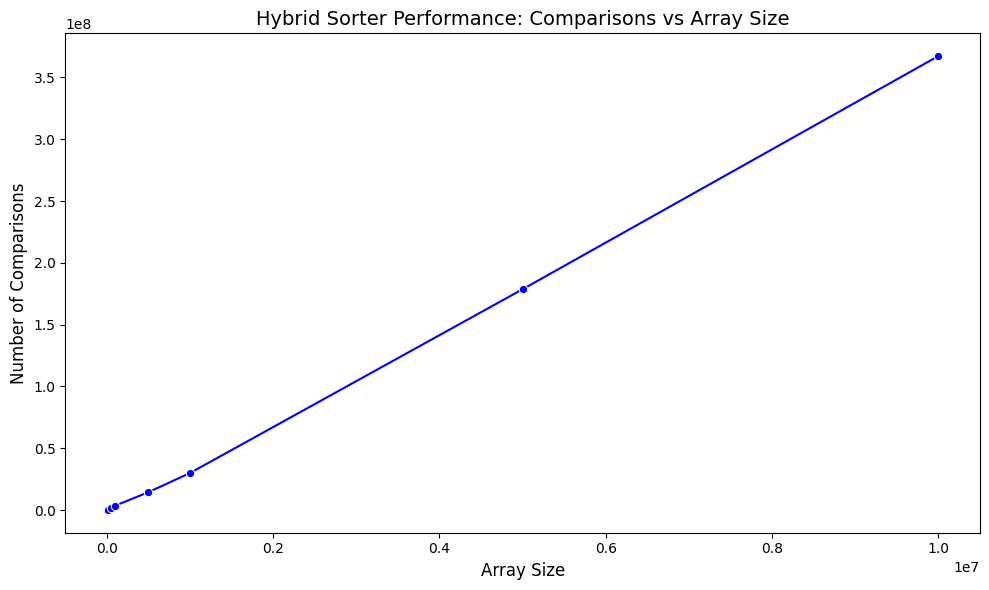

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
# sns.set(style="seaborn-v0_8")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Array Size', y='Comparisons', marker='o', color='blue')

# Label the axes and add a title
plt.xlabel('Array Size', fontsize=12)
plt.ylabel('Number of Comparisons', fontsize=12)
plt.title('Hybrid Sorter Performance: Comparisons vs Array Size', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


### C ii & iii

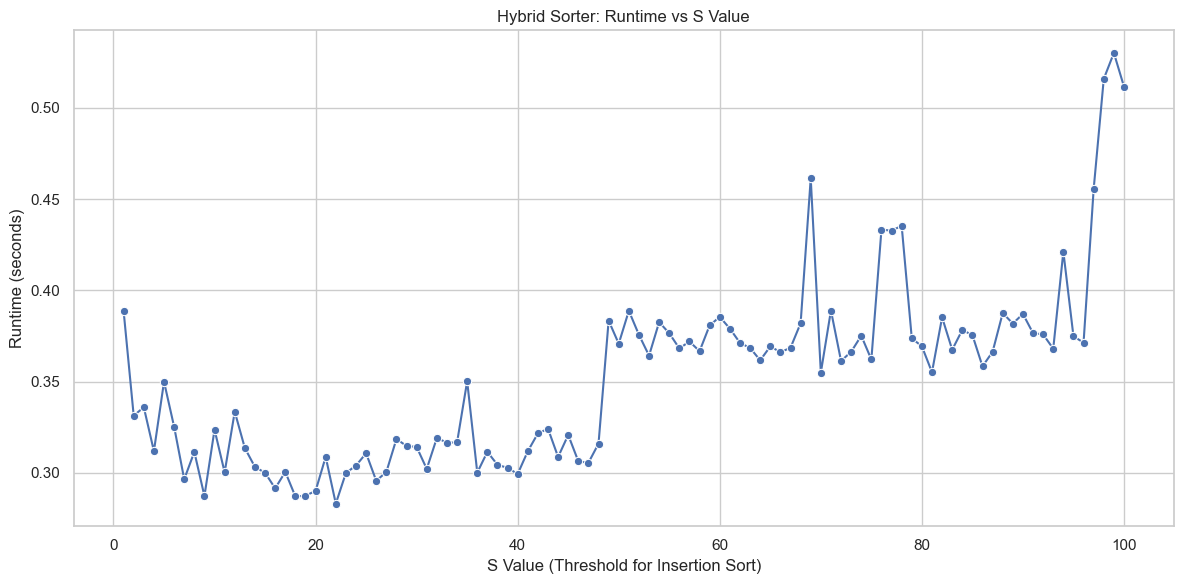

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# --- Your hybrid sorter functions ---
# (Assuming insert_sort, merge_sort, and merge are already defined)

# --- Generate a fixed random array ---
array_size = 100_000
base_array = np.random.randint(1, array_size + 1, array_size).tolist()

# --- Run hybrid sorter for S in range 1 to 100 and record runtime ---
results = []
for S in range(1, 101):
    arr_copy = base_array.copy()
    start_time = time.time()
    merge_sort(arr_copy, S, comp_cnt=0)
    end_time = time.time()
    runtime = end_time - start_time
    results.append({'S Value': S, 'Runtime (s)': runtime})

df = pd.DataFrame(results)

# --- Plot the results ---
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='S Value', y='Runtime (s)', marker='o')
plt.title('Hybrid Sorter: Runtime vs S Value')
plt.xlabel('S Value (Threshold for Insertion Sort)')
plt.ylabel('Runtime (seconds)')
plt.tight_layout()
plt.show()



### D

           Algorithm  Comparisons  Runtime (s)
0  Vanilla Mergesort      1536294     0.478562
1   Hybrid Mergesort      1639730     0.387651


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18484\4229252892.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Runtime (s)', data=results_df, ax=ax1, palette='pastel')


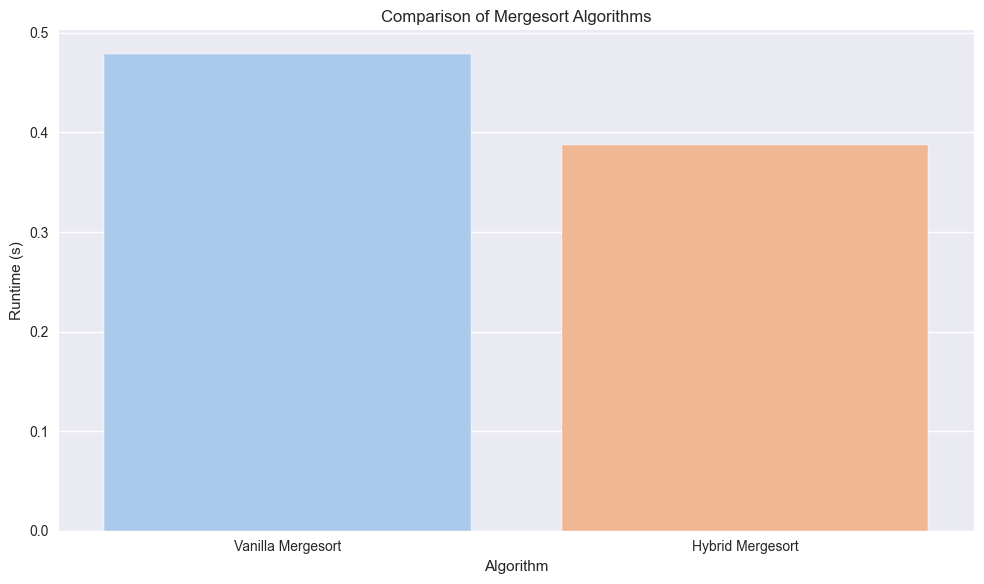

In [11]:
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
plt.style.use('seaborn-v0_8')

# Generate random array
array_size = 100000
random_array = [random.randint(1, array_size) for _ in range(array_size)]

# Global counters for comparisons
vanilla_comparisons = 0
hybrid_comparisons = 0

# Vanilla mergesort implementation
def vanilla_merge_sort(arr):
    global vanilla_comparisons
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = vanilla_merge_sort(arr[:mid])
    right = vanilla_merge_sort(arr[mid:])
    return vanilla_merge(left, right)

def vanilla_merge(left, right):
    global vanilla_comparisons
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        vanilla_comparisons += 1
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# Hybrid mergesort implementation with insertion sort for small arrays
S = 22

def insertion_sort(arr):
    global hybrid_comparisons
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybrid_comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        hybrid_comparisons += 1 if j >= 0 else 0
        arr[j + 1] = key
    return arr

def hybrid_merge_sort(arr):
    global hybrid_comparisons
    if len(arr) <= S:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = hybrid_merge_sort(arr[:mid])
    right = hybrid_merge_sort(arr[mid:])
    return hybrid_merge(left, right)

def hybrid_merge(left, right):
    global hybrid_comparisons
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        hybrid_comparisons += 1
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# Measure vanilla mergesort
start_time = time.time()
vanilla_merge_sort(random_array.copy())
vanilla_runtime = time.time() - start_time

# Measure hybrid mergesort
start_time = time.time()
hybrid_merge_sort(random_array.copy())
hybrid_runtime = time.time() - start_time

# Create DataFrame
results_df = pd.DataFrame({
    'Algorithm': ['Vanilla Mergesort', 'Hybrid Mergesort'],
    'Comparisons': [vanilla_comparisons, hybrid_comparisons],
    'Runtime (s)': [vanilla_runtime, hybrid_runtime]
})

# Plot bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Runtime (s)', data=results_df, ax=ax1, palette='pastel')
ax1.set_title('Comparison of Mergesort Algorithms')
ax1.set_ylabel('Runtime (s)')
ax1.set_xlabel('Algorithm')

# Save plot
plt.tight_layout()

# Print results
print(results_df)
